<a href="https://colab.research.google.com/github/anand-w-dcu54/lifestyle_diabeties/blob/work%2Fanand/BRFSS_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start up notebook for behavioural risk factors

In [2]:
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 975.4 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

#Load dataset - diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015.
#The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.
#There is class imbalance in this dataset. This dataset has 21 feature variables

#File path https://drive.google.com/file/d/1V7brEY8oKth3fK6thmf3HtL1SduS2bVH/view?usp=drive_link

file_diabeties012 = drive.CreateFile({'id':'1V7brEY8oKth3fK6thmf3HtL1SduS2bVH'})
file_diabeties012.GetContentFile('brfss_diabeties.csv')
dataset_diabeties012 = pd.read_csv('brfss_diabeties.csv')

In [4]:
dataset_diabeties012.describe().round(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,...,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000
mean,0.297,0.429,0.424,0.963,28.382,0.443,0.041,0.094,0.757,0.634,...,0.951,0.084,2.511,3.185,4.242,0.168,0.440,8.032,5.050,6.054
std,0.698,0.495,0.494,0.190,6.609,0.497,0.197,0.292,0.429,0.482,...,0.216,0.278,1.068,7.413,8.718,0.374,0.496,3.054,0.986,2.071
min,0.000,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,...,1.000,0.000,2.000,0.000,0.000,0.000,0.000,6.000,4.000,5.000
50%,0.000,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,...,1.000,0.000,2.000,0.000,0.000,0.000,0.000,8.000,5.000,7.000
75%,0.000,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,...,1.000,0.000,3.000,2.000,3.000,0.000,1.000,10.000,6.000,8.000
max,2.000,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,5.000,30.000,30.000,1.000,1.000,13.000,6.000,8.000


In [5]:
dataset_diabeties012.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
#Load the bin dataset diabetes_binary_health_indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015.
#The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes.
#This dataset has 21 feature variables and is not balanced

#file path : https://drive.google.com/file/d/1xWINlAEdJjfAcmPwoO5p2FjVTLXZ2Epp/view?usp=drive_link

file_diabeties_bin = drive.CreateFile({'id':'1xWINlAEdJjfAcmPwoO5p2FjVTLXZ2Epp'})
file_diabeties_bin.GetContentFile('brfss_diabeties_bin.csv')
dataset_diabeties_bin = pd.read_csv('brfss_diabeties_bin.csv')

In [7]:
dataset_diabeties_bin.describe().round(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,...,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000
mean,0.139,0.429,0.424,0.963,28.382,0.443,0.041,0.094,0.757,0.634,...,0.951,0.084,2.511,3.185,4.242,0.168,0.440,8.032,5.050,6.054
std,0.346,0.495,0.494,0.190,6.609,0.497,0.197,0.292,0.429,0.482,...,0.216,0.278,1.068,7.413,8.718,0.374,0.496,3.054,0.986,2.071
min,0.000,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,...,1.000,0.000,2.000,0.000,0.000,0.000,0.000,6.000,4.000,5.000
50%,0.000,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,...,1.000,0.000,2.000,0.000,0.000,0.000,0.000,8.000,5.000,7.000
75%,0.000,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,...,1.000,0.000,3.000,2.000,3.000,0.000,1.000,10.000,6.000,8.000
max,1.000,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,5.000,30.000,30.000,1.000,1.000,13.000,6.000,8.000


In [8]:
#Load the 50-50 dataset which is balanced

#file paath : https://drive.google.com/file/d/1ciA1V5aDFhMxJAWP-w3exbxwD1IrF_7f/view?usp=drive_link

file_diabeties5050 = drive.CreateFile({'id':'1ciA1V5aDFhMxJAWP-w3exbxwD1IrF_7f'})
file_diabeties5050.GetContentFile('brfss_diabeties_50.csv')
dataset_diabeties50 = pd.read_csv('brfss_diabeties_50.csv')

In [9]:
dataset_diabeties50.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<ipython-input-10-f24049c1f58d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=dataset_diabeties012, palette='hls')


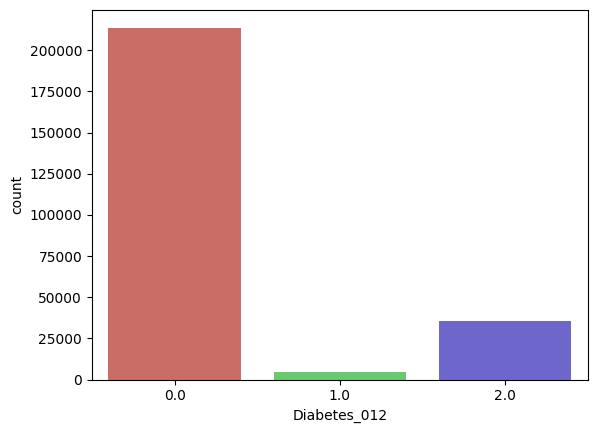

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Diabetes_012', data=dataset_diabeties012, palette='hls')
plt.show()

<ipython-input-11-072ef871f349>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=dataset_diabeties50, palette='hls')


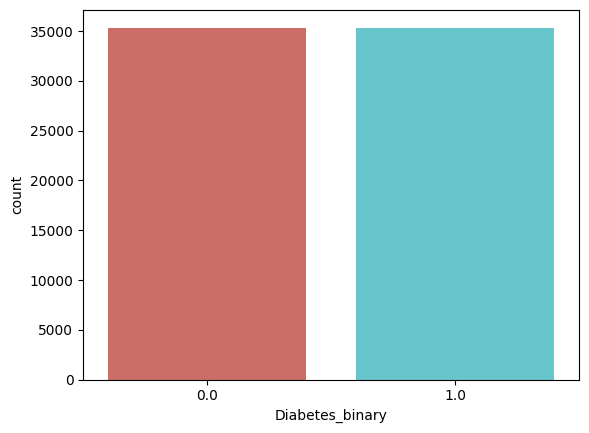

In [11]:
sns.countplot(x='Diabetes_binary', data=dataset_diabeties50, palette='hls')
plt.show()

In [12]:
#Get the 2021 50-50 split dataset:

#sourced from https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset/data

#filepath - https://drive.google.com/file/d/1318MmyYZFYtTigKYX1IuGQPw-SfYTvY4/view?usp=drive_link

file_diabeties_21_5050 = drive.CreateFile({'id':'1318MmyYZFYtTigKYX1IuGQPw-SfYTvY4'})
file_diabeties_21_5050.GetContentFile('brfss_diabeties_21_50.csv')
dataset_diabeties_21_50 = pd.read_csv('brfss_diabeties_21_50.csv')

In [13]:
dataset_diabeties_21_50.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [14]:
dataset_diabeties50.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [15]:
dataset_diabeties_21_50.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,...,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000,67136.000000
mean,0.500000,0.548320,0.500238,0.976227,30.288340,0.440151,0.058866,0.136633,0.717260,0.605919,...,0.967260,0.066522,2.774756,4.230845,5.136752,0.231202,0.493431,8.501743,5.035912,6.563885
std,0.500004,0.497663,0.500004,0.152341,7.095737,0.496409,0.235375,0.343462,0.450334,0.488656,...,0.177955,0.249194,1.073759,8.323138,9.593837,0.421605,0.499961,3.019624,0.981610,2.422641
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [16]:
combined_df = pd.concat([dataset_diabeties_21_50, dataset_diabeties50], axis=0).reset_index(drop=True)

In [17]:
combined_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,...,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000,137828.000000
mean,0.500000,0.556084,0.513299,0.975731,30.067098,0.458165,0.060561,0.142366,0.709965,0.608933,...,0.960951,0.080571,2.806723,3.985264,5.482275,0.242244,0.474744,8.543961,4.976950,6.119932
std,0.500002,0.496846,0.499825,0.153885,7.108331,0.498249,0.238524,0.349426,0.453780,0.487991,...,0.193711,0.272177,1.094795,8.241093,9.842604,0.428443,0.499364,2.935200,1.007873,2.339402
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


<ipython-input-18-5b88f66a1a9d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=combined_df, palette='hls')


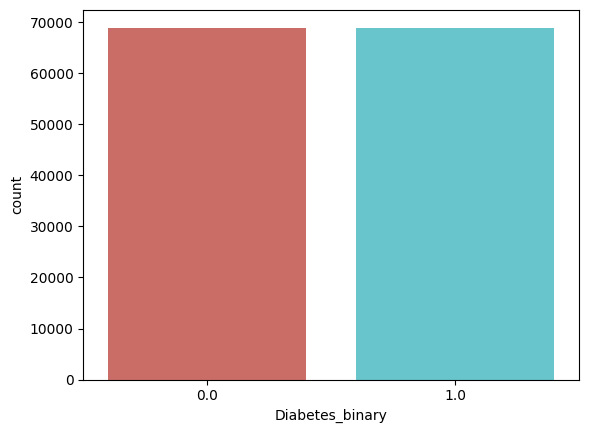

In [18]:
sns.countplot(x='Diabetes_binary', data=combined_df, palette='hls')
plt.show()

In [19]:
corr = combined_df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].corr()

corr.style.background_gradient(cmap='coolwarm')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.309041,0.105154,0.235247,0.087850,0.128100,0.208854,-0.142321,-0.036061,-0.057579,-0.028755,0.044164,0.016937,0.312691,0.040962,0.163572,0.228344,0.052367,0.340597,-0.129145,-0.179739
HighChol,0.309041,1.000000,0.092725,0.115729,0.090001,0.092412,0.175768,-0.091804,-0.040877,-0.044037,-0.027176,0.038486,0.024523,0.226635,0.063197,0.133358,0.154055,0.020677,0.248879,-0.070908,-0.102425
CholCheck,0.105154,0.092725,1.000000,0.048264,-0.004205,0.022450,0.044017,-0.015395,0.015544,0.006361,-0.031945,0.117897,-0.056903,0.060098,-0.009928,0.036220,0.048124,-0.021148,0.106797,0.001399,0.004256
BMI,0.235247,0.115729,0.048264,1.000000,0.011480,0.016244,0.051707,-0.177390,-0.084384,-0.047856,-0.048935,-0.005595,0.055839,0.269357,0.108497,0.157003,0.243513,-0.011825,-0.047585,-0.094904,-0.120079
Smoker,0.087850,0.090001,-0.004205,0.011480,1.000000,0.060971,0.124892,-0.083045,-0.069824,-0.022768,0.079366,-0.015197,0.039970,0.157379,0.085933,0.118914,0.122316,0.100923,0.108857,-0.153634,-0.124844
Stroke,0.128100,0.092412,0.022450,0.016244,0.060971,1.000000,0.207416,-0.080981,-0.005408,-0.039171,-0.024664,0.011296,0.035033,0.180440,0.074958,0.155464,0.182817,0.002821,0.123919,-0.068015,-0.131353
HeartDiseaseorAttack,0.208854,0.175768,0.044017,0.051707,0.124892,0.207416,1.000000,-0.104736,-0.016232,-0.032564,-0.039649,0.019639,0.030746,0.269688,0.063733,0.194376,0.220786,0.099652,0.225399,-0.092496,-0.141713
PhysActivity,-0.142321,-0.091804,-0.015395,-0.177390,-0.083045,-0.080981,-0.104736,1.000000,0.124280,0.142878,0.023637,0.023361,-0.059929,-0.291145,-0.131779,-0.253236,-0.292292,0.058206,-0.118246,0.196787,0.221465
Fruits,-0.036061,-0.040877,0.015544,-0.084384,-0.069824,-0.005408,-0.016232,0.124280,1.000000,0.222854,-0.034385,0.024659,-0.037485,-0.088785,-0.060591,-0.041995,-0.041784,-0.072896,0.064440,0.089744,0.061523
Veggies,-0.057579,-0.044037,0.006361,-0.047856,-0.022768,-0.039171,-0.032564,0.142878,0.222854,1.000000,0.018899,0.033057,-0.036376,-0.111653,-0.047266,-0.065444,-0.079871,-0.045418,-0.014643,0.142553,0.153441


1. Find Outliers on all the input variables
2. Plot whisker charts for them
3. Impute the outliers - sane values
4. again check for multicollinearity and VIF
5. Run Lasso Regression
6. Principal component anlaysis

# **Find Missing values**

In [20]:
combined_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [21]:
len(list(combined_df.columns))

22

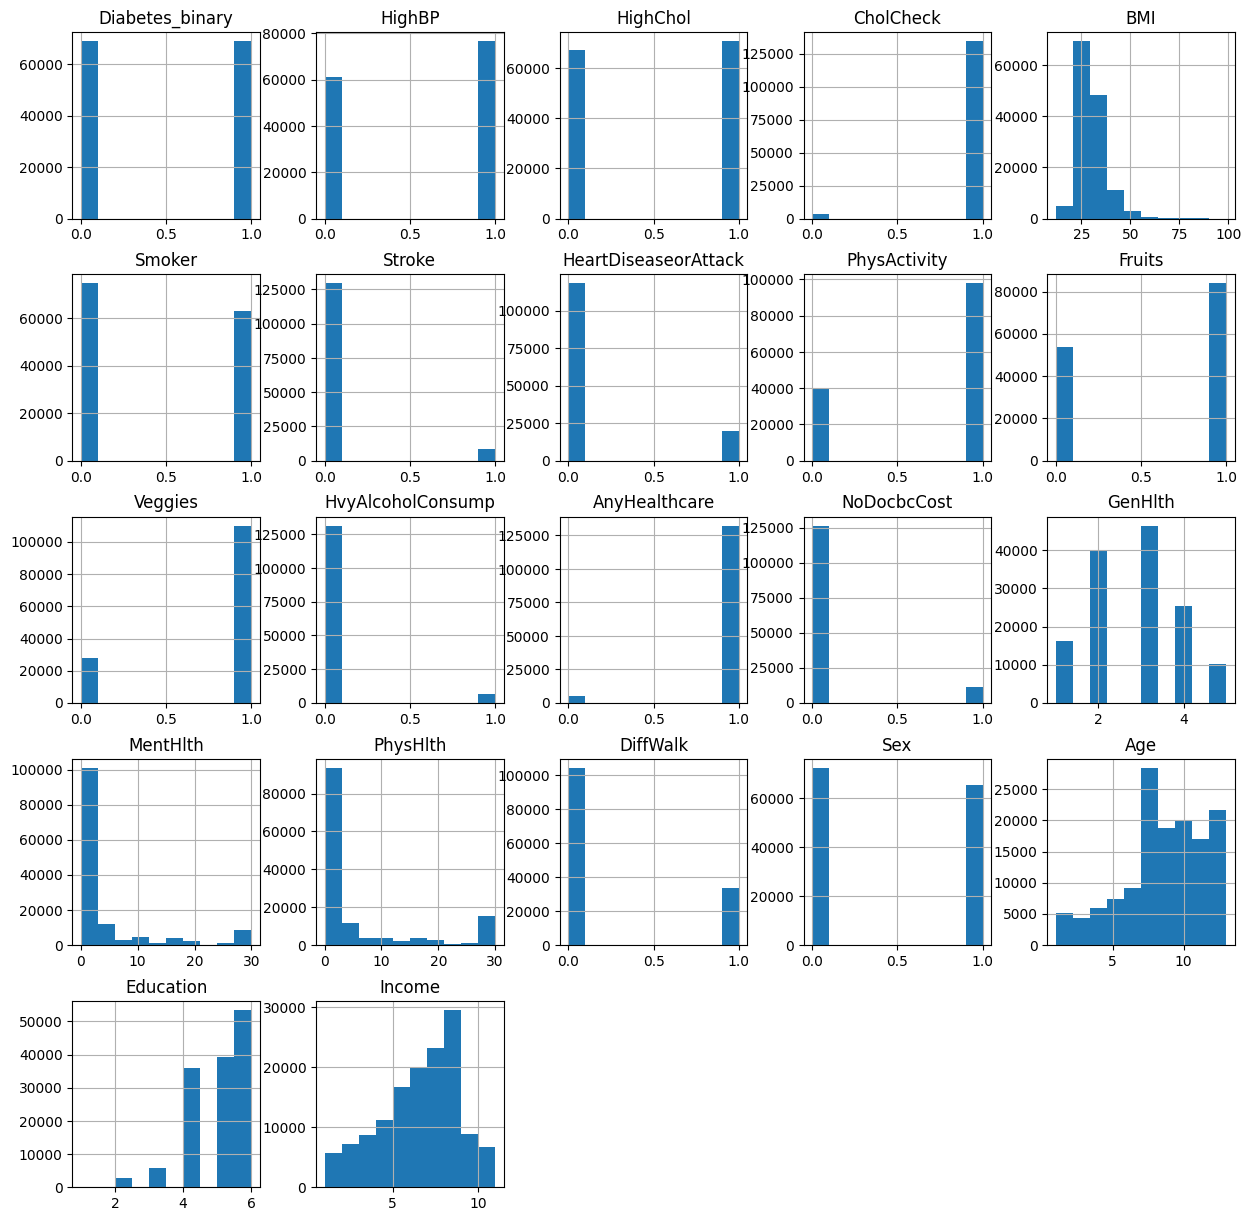

In [22]:
combined_df.hist(figsize=(15,15))
plt.show()

In [23]:
unknown_vals = combined_df[combined_df['CholCheck'] == 1]
unknown_vals.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,15.0,0.0,1.0,1.0,7.0,6.0,9.0
1,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,1.0,2.0,0.0,1.0,7.0,6.0,6.0
2,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,30.0,0.0,1.0,13.0,4.0,3.0
3,0.0,0.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,5.0,7.0
4,0.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0


In [24]:
combined_df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [26]:
#Get diabeties rows
df_diabetes = combined_df[combined_df['Diabetes_binary'] == 1]
df_diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,68914.0,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,...,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000,68914.000000
mean,1.0,0.743695,0.655222,0.994080,32.062455,0.500058,0.089880,0.215500,0.629495,0.586223,...,0.967423,0.089242,3.239893,4.547378,7.487405,0.355936,0.499173,9.381069,4.821343,5.615826
std,0.0,0.436595,0.475299,0.076717,7.377825,0.500004,0.286012,0.411172,0.482944,0.492513,...,0.177528,0.285094,1.003788,8.914648,11.102238,0.478800,0.500003,2.387533,1.037346,2.340750
min,1.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,4.000000
50%,1.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,6.000000
75%,1.0,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,4.000000,12.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


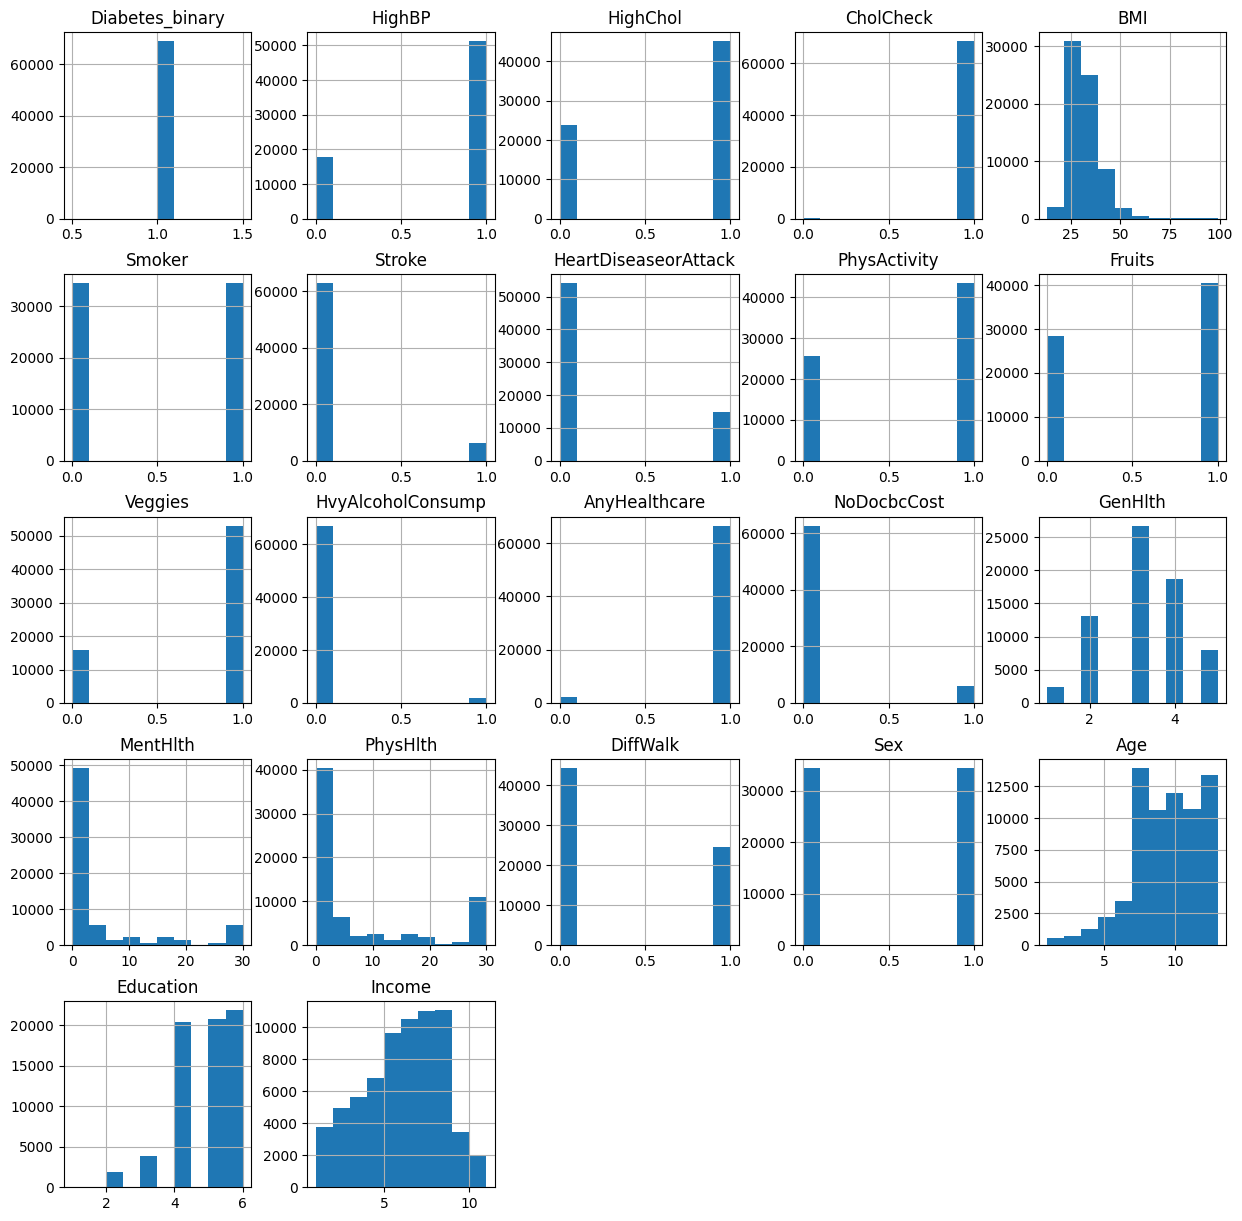

In [27]:
df_diabetes.hist(figsize=(15,15))
plt.show()

In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137828 entries, 0 to 137827
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       137828 non-null  float64
 1   HighBP                137828 non-null  float64
 2   HighChol              137828 non-null  float64
 3   CholCheck             137828 non-null  float64
 4   BMI                   137828 non-null  float64
 5   Smoker                137828 non-null  float64
 6   Stroke                137828 non-null  float64
 7   HeartDiseaseorAttack  137828 non-null  float64
 8   PhysActivity          137828 non-null  float64
 9   Fruits                137828 non-null  float64
 10  Veggies               137828 non-null  float64
 11  HvyAlcoholConsump     137828 non-null  float64
 12  AnyHealthcare         137828 non-null  float64
 13  NoDocbcCost           137828 non-null  float64
 14  GenHlth               137828 non-null  float64
 15  

# **Check for outliers**

In [34]:
cols = list(combined_df.columns)

print(cols)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [35]:
copy_of_combined_df = combined_df
#cols.append('Diabtes_binary')
for col in cols:
  copy_of_combined_df[col] = copy_of_combined_df[col].astype(int)

cols.remove('Diabetes_binary')

<ipython-input-37-bf1997c49e91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=copy_of_combined_df, palette='Set2')
<ipython-input-37-bf1997c49e91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=copy_of_combined_df, palette='Set2')
<ipython-input-37-bf1997c49e91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=copy_of_combined_df, palette='Set2')
<ipython-input-37-bf1997c49e91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

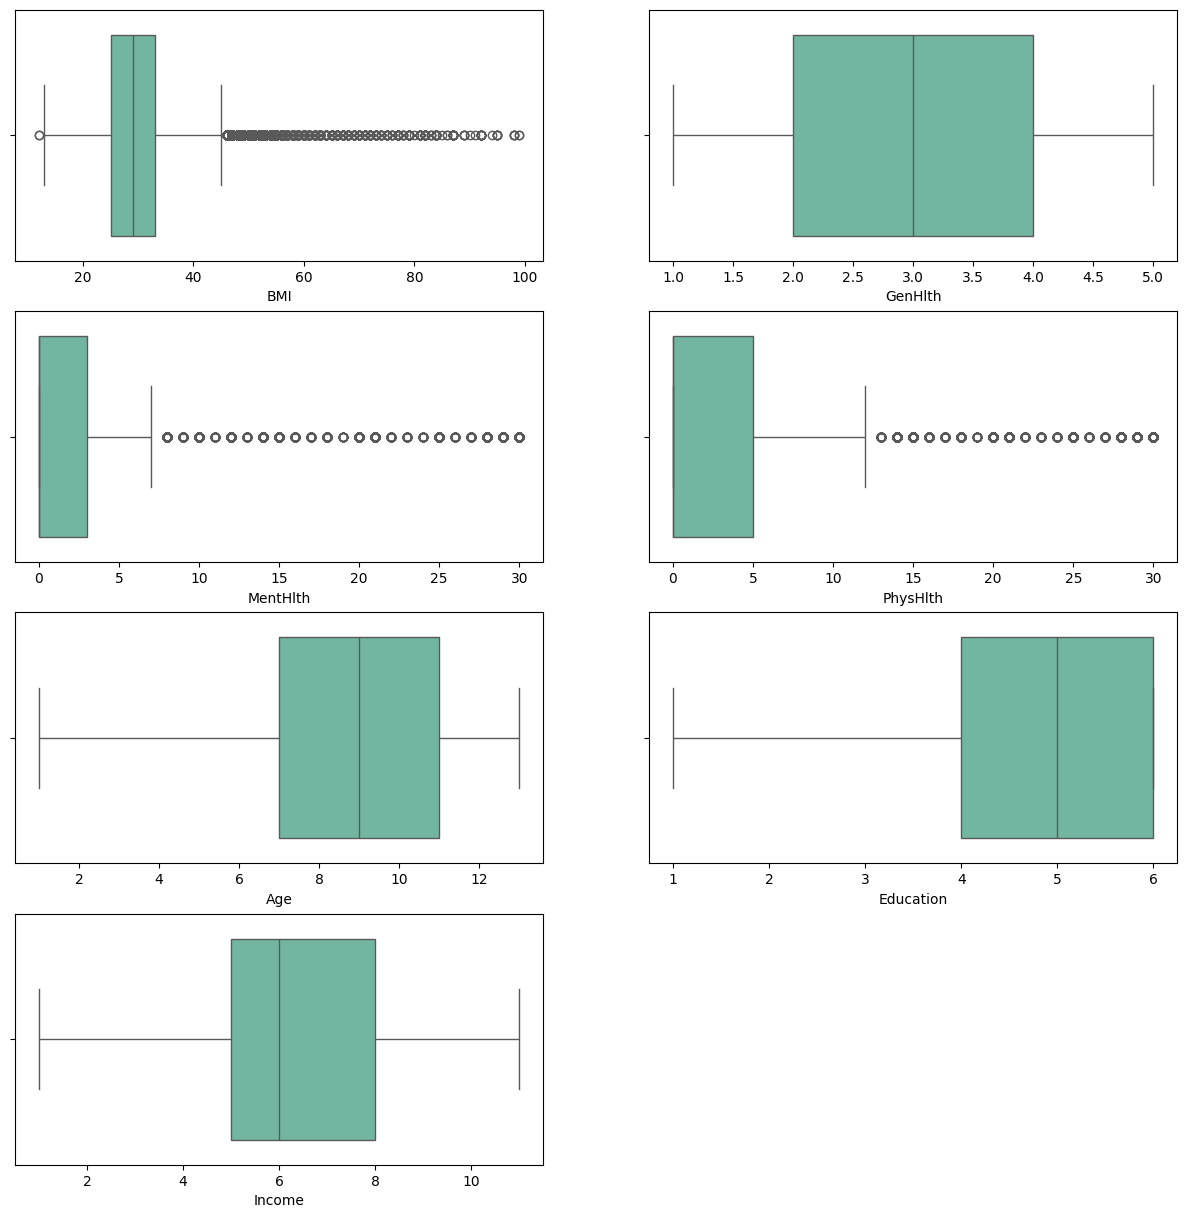

In [37]:

plt.figure(figsize=(15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=col, data=copy_of_combined_df, palette='Set2')
plt.show()

In [38]:
combined_df.duplicated().sum()

3273

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)



22
